# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

from seaborn import load_dataset

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [35]:
reg_tip = smf.ols('tip ~ net_bill', data = tips).fit()

In [54]:
print("R2: ", reg_tip.rsquared)

R2:  0.3325407312323707


(0.0, 10.45)

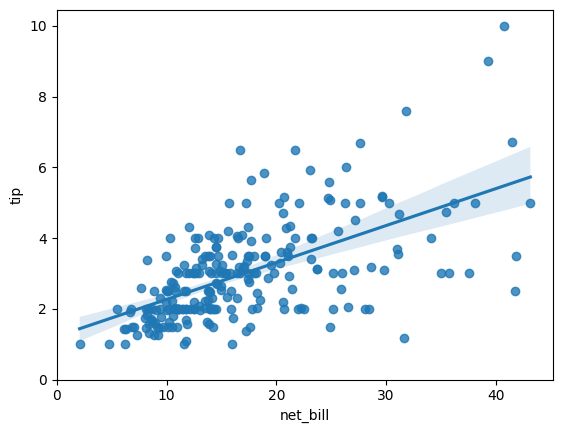

In [25]:
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct']<.5])
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [36]:
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()

In [55]:
print("R2: ", reg_tip_pct.rsquared)

R2:  0.09129084920662944


(0.0, 0.505398619388979)

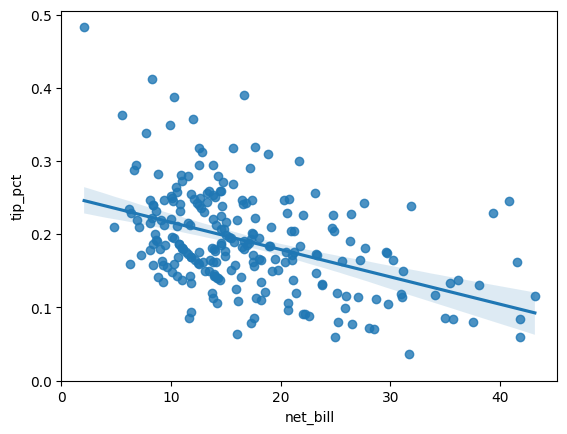

In [26]:
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct']<.5])
plt.xlim(left = 0)
plt.ylim(bottom = 0)

<AxesSubplot: xlabel='net_bill', ylabel='tip_pct'>

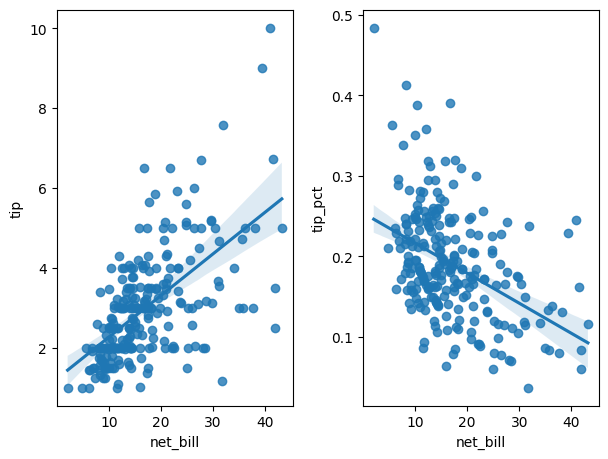

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct']<.5], ax=ax1)
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct']<.5], ax=ax2)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Comparando os 2 gráficos podemos observar que o percentual de gorjeta tende a ser maior para as contas de menor valor. Não podemos comparar diretamente os $R^2$s porque estão em escalas diferentes.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [45]:
df_copia = tips.copy()
df_copia['pred_tip'] = reg_tip_pct.fittedvalues * df_copia['net_bill']
df_copia.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.699998


In [56]:
reg_tip_pred = smf.ols('pred_tip ~ net_bill', data = df_copia).fit()

In [57]:
print("R2 item 4: ", reg_tip_pred.rsquared)
print("R2 item 1: ", reg_tip.rsquared)

R2 item 4:  0.29185213963974743
R2 item 1:  0.3325407312323707


O valor do R2 foi ligeiramente infeior ao R2 calculado no item 1